In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import datetime as dt
import natsort 
import glob
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def rebin(hx,h, bin=1):
    h_rebin = []
    for i,x in enumerate(h[:int(len(h)/bin)]):
        num = i*bin
        h_rebin.append(h[num]+h[num+1])
    hx_rebin = [x for x in range(int(len(hx)/bin))]
    return np.array(hx_rebin), np.array(h_rebin)

In [3]:
def gauss(x,a,mu,sigma,c):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2)+c)

def exp(x,h,b):
    return(h*np.exp(-x*b))

def func(x,h,b,c,a,mu,sigma):
    return(h*np.exp(-x*b)+(a*np.exp(-0.5*((x-mu)/sigma)**2)+c))

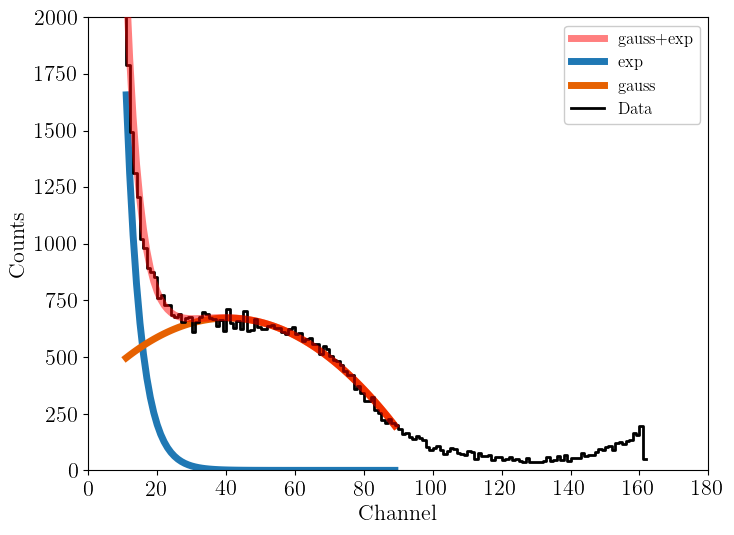

In [15]:
dir='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20220117/source_data_32V/'
filename=[]
count_sum=0
channel_sum=0
for filenames in os.listdir(dir):
    filename.append(dir+filenames)
for files in natsort.natsorted(filename):
    df=pd.read_csv(files,skiprows=1)
    count_sum+=df['Counts']
    channel_sum+=df['Channel']
    
hx,h=rebin(np.array(channel_sum),np.array(count_sum),100)
cut=np.where((hx>10) & (hx<90))
popt,pcov=curve_fit(func,hx[cut],h[cut],p0=[np.max(h[cut]),0.1,2,np.max(h[cut]),50,10],maxfev=100000)
plt.figure(figsize=(8,6))
plt.plot(hx[cut],func(hx[cut],*popt),color='r',zorder=10,label='gauss+exp',lw=5,alpha=0.5)
plt.plot(hx[cut],exp(hx[cut],popt[0],popt[1]),lw=5,label='exp')
plt.plot(hx[cut],gauss(hx[cut],popt[3],popt[4],popt[5],popt[2]),lw=5,label='gauss')
plt.step(hx,h,lw=2,color='k',label='Data')
# plt.yscale('log')
plt.legend(loc=1)
plt.ylim(0,2000)
plt.ylabel('Counts')
plt.xlabel('Channel')
plt.show()


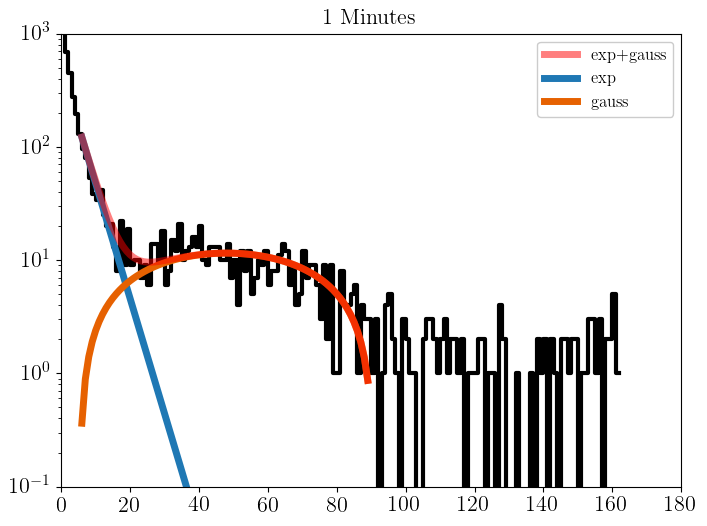

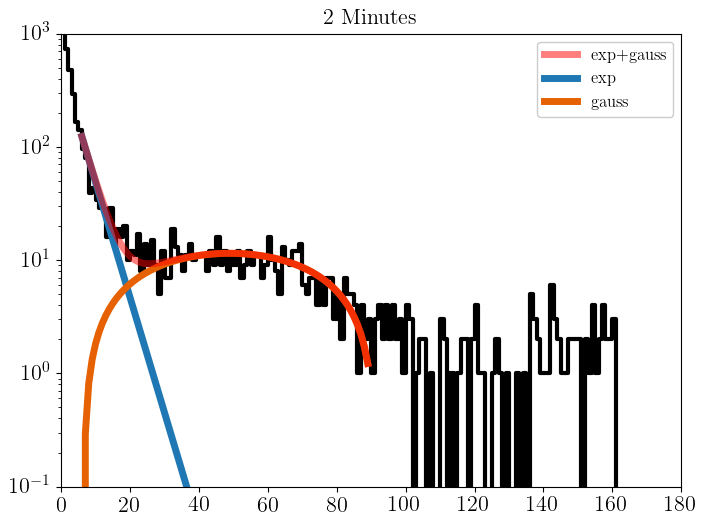

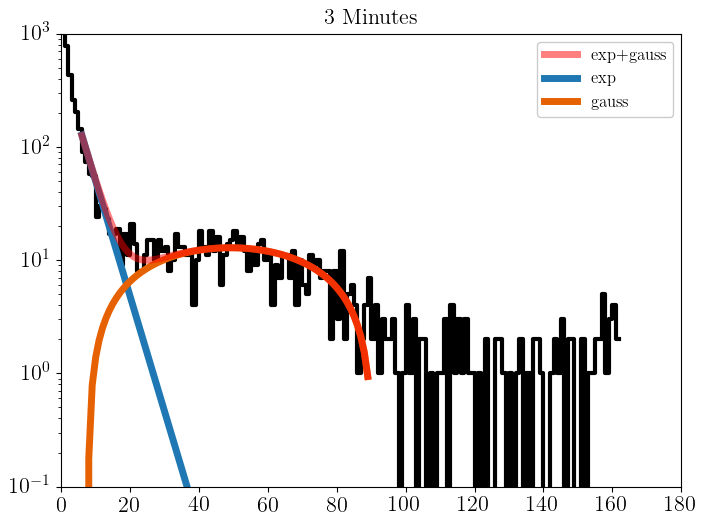

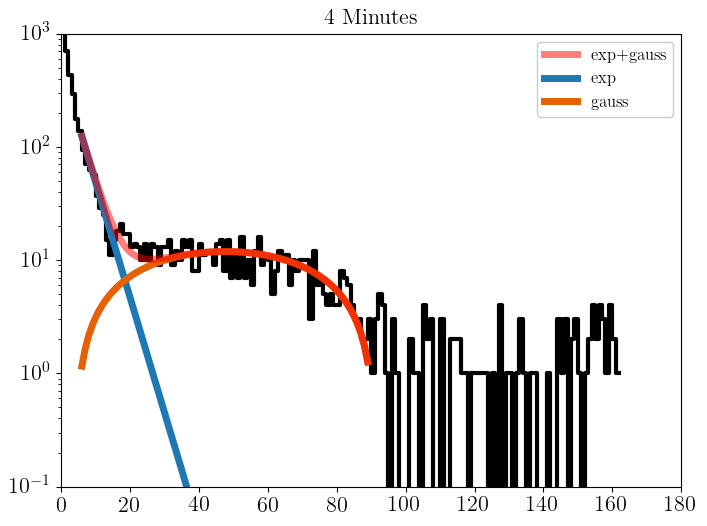

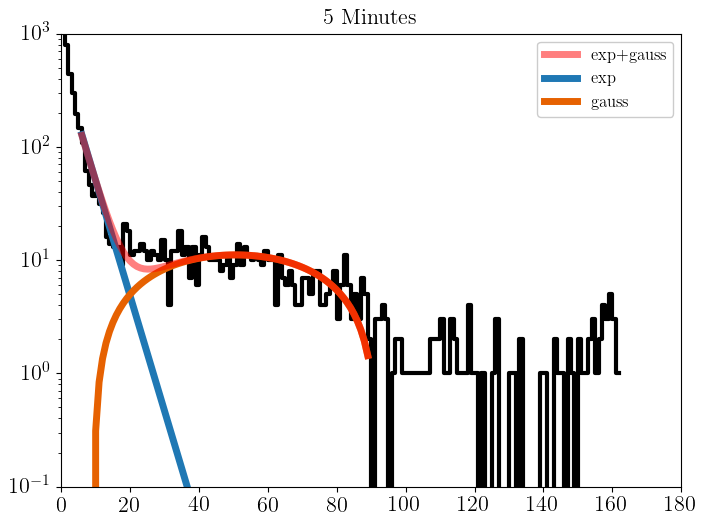

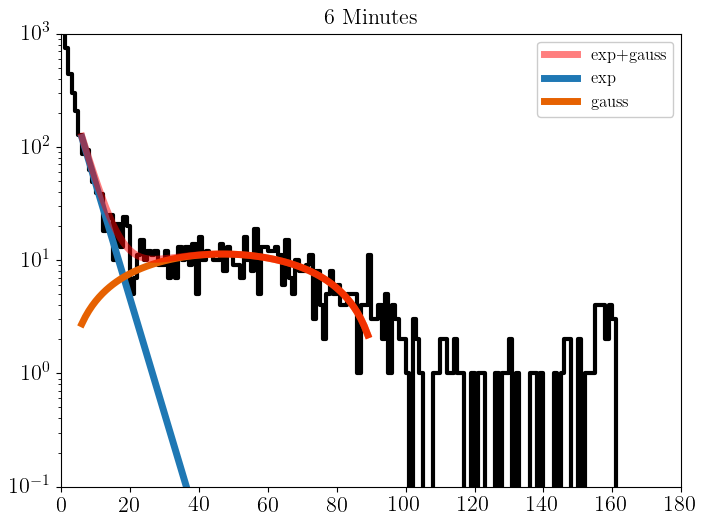

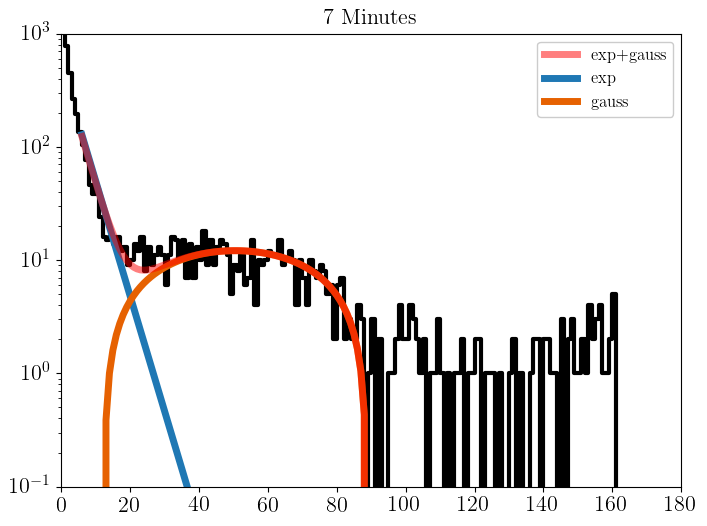

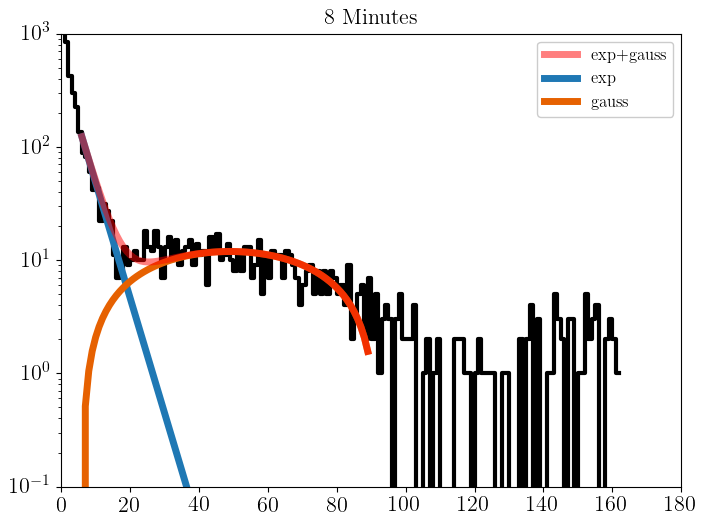

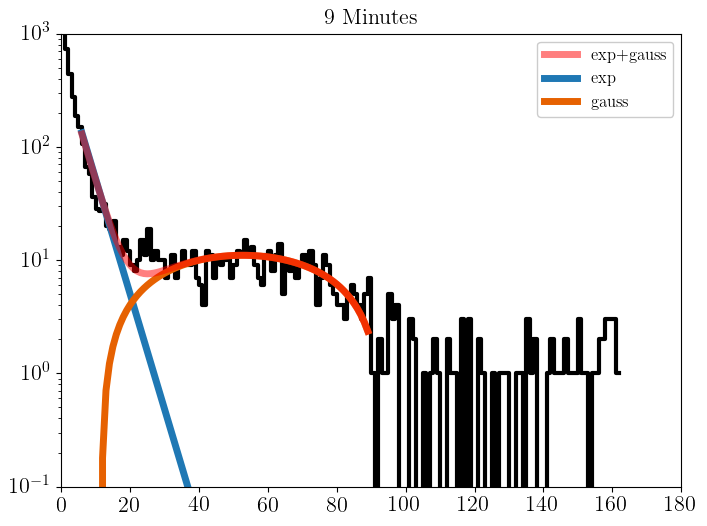

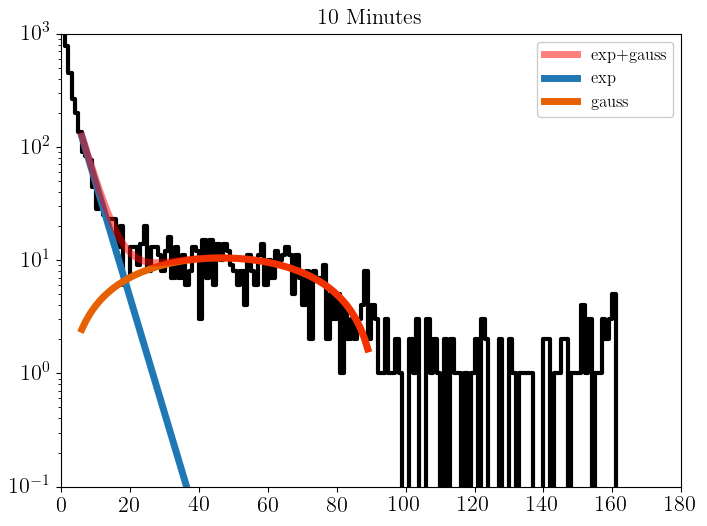

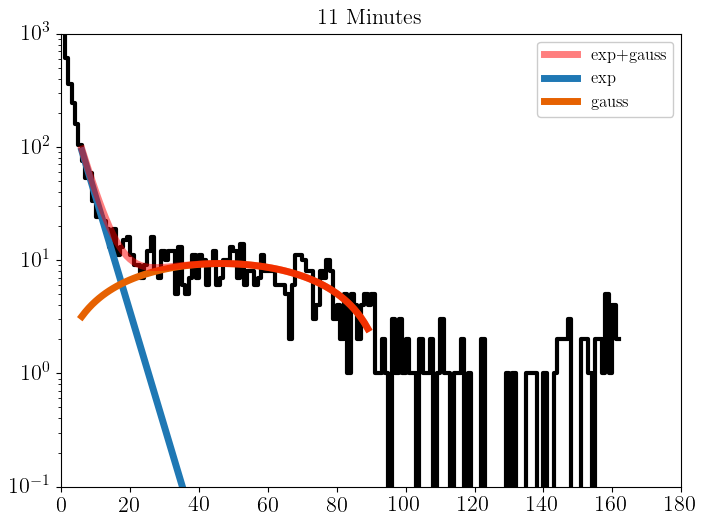

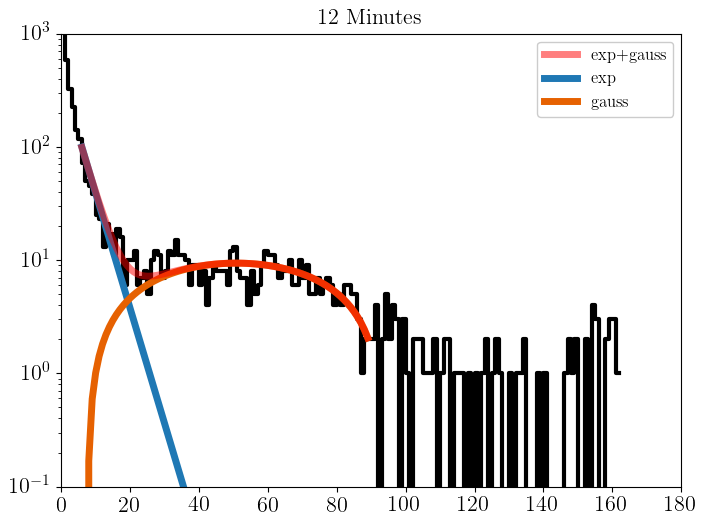

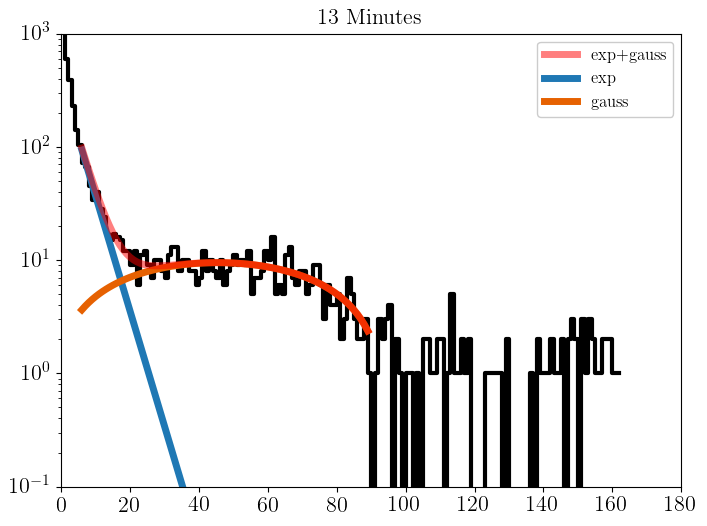

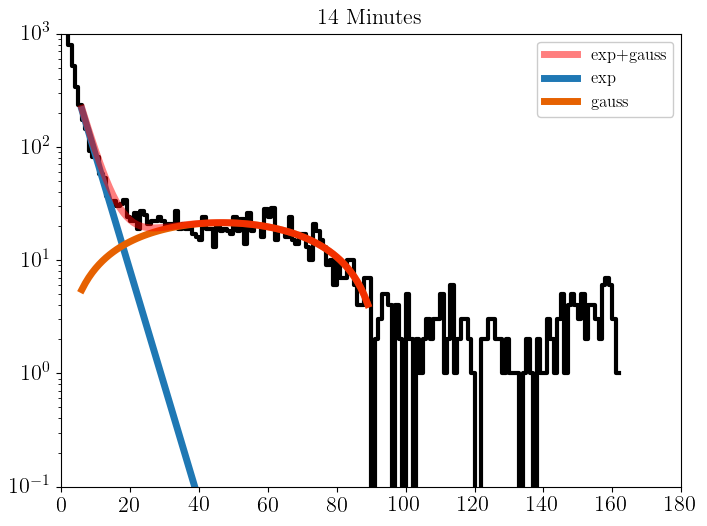

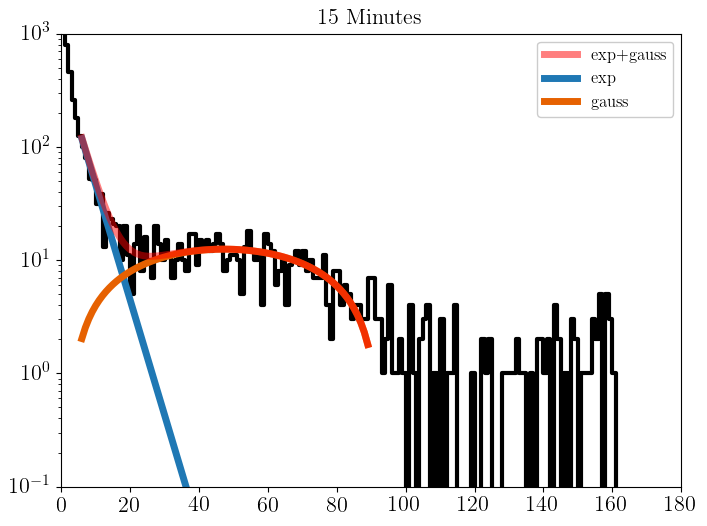

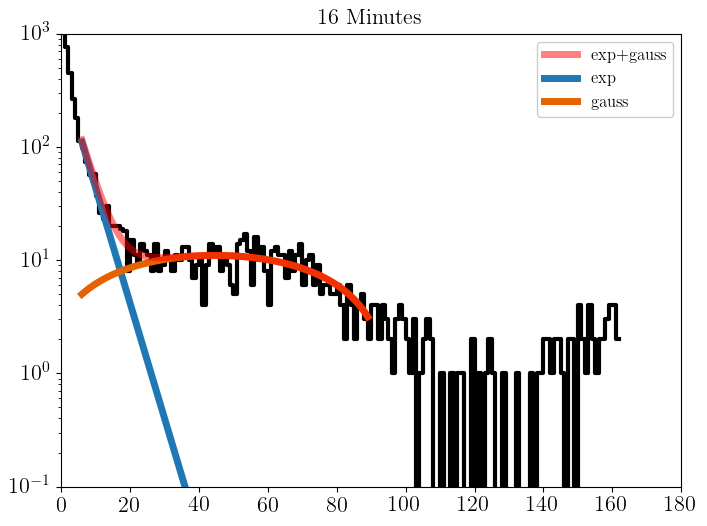

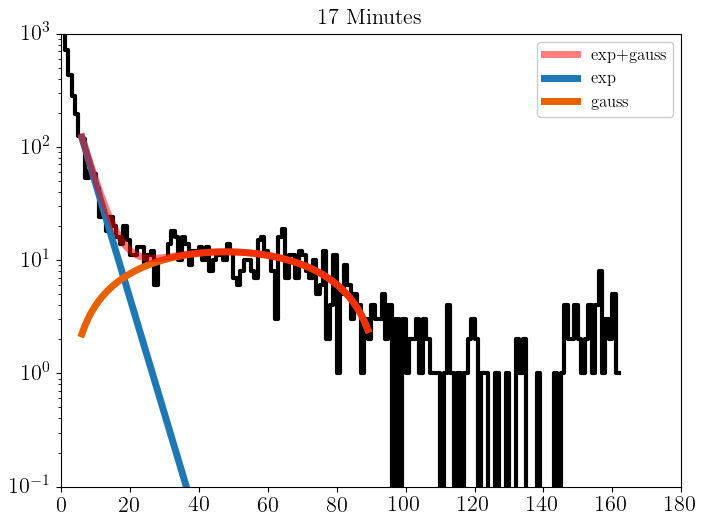

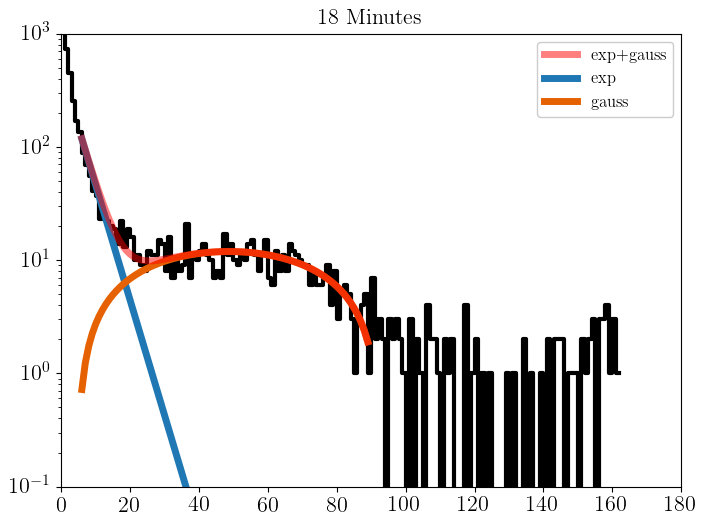

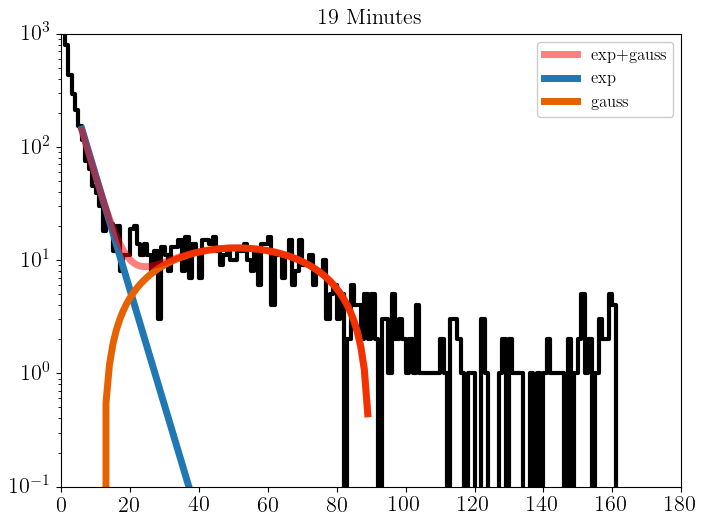

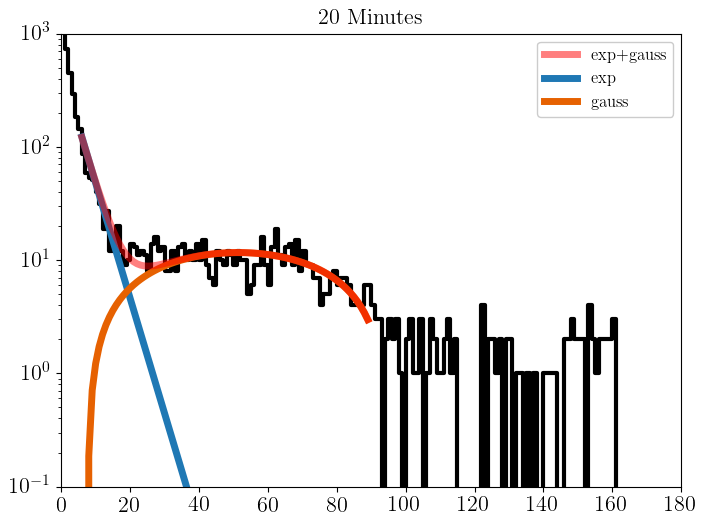

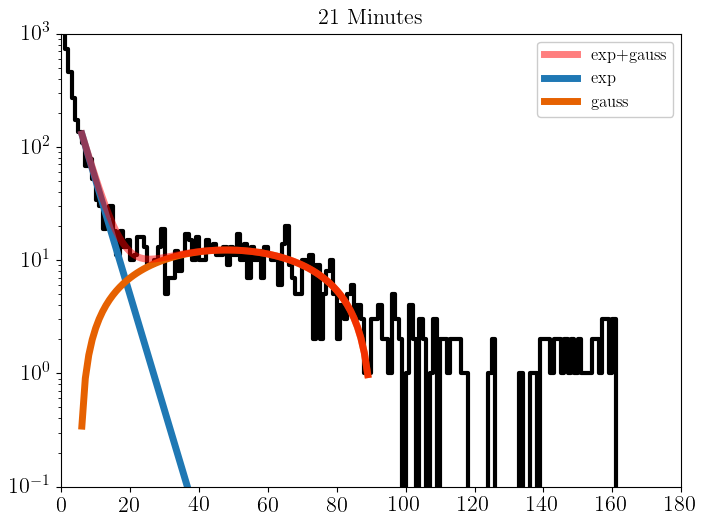

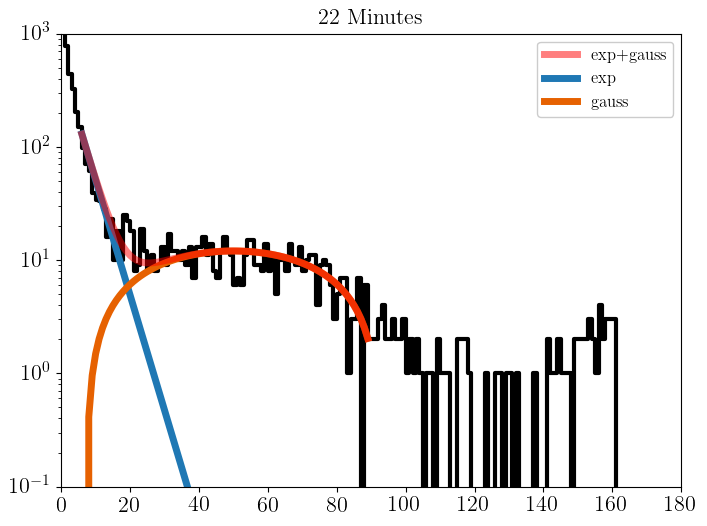

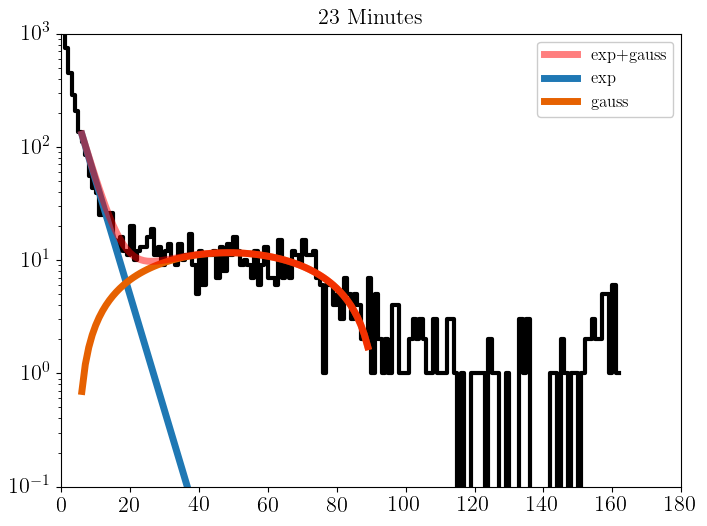

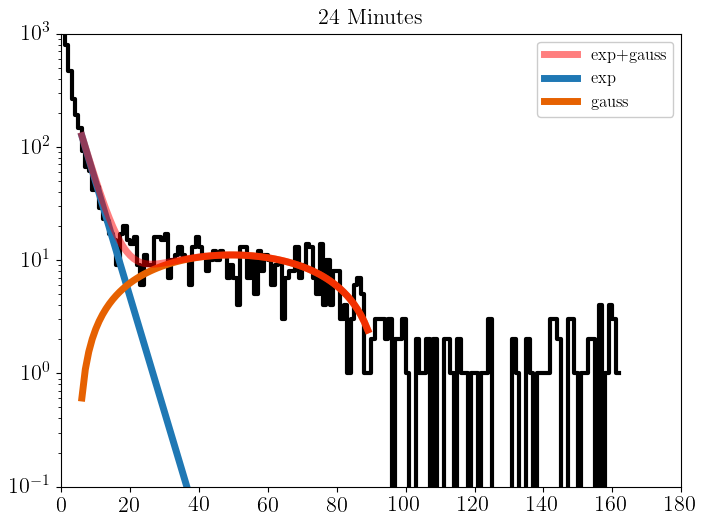

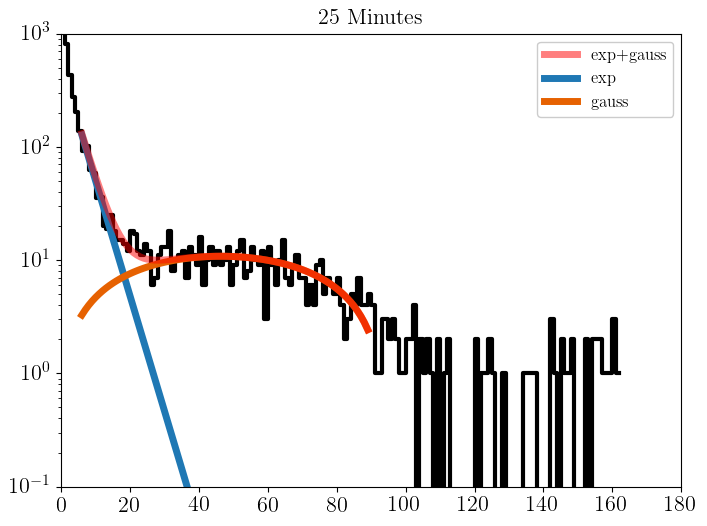

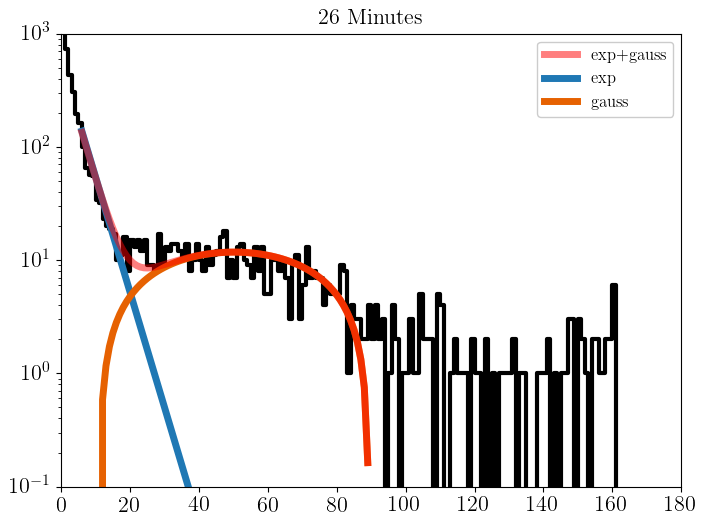

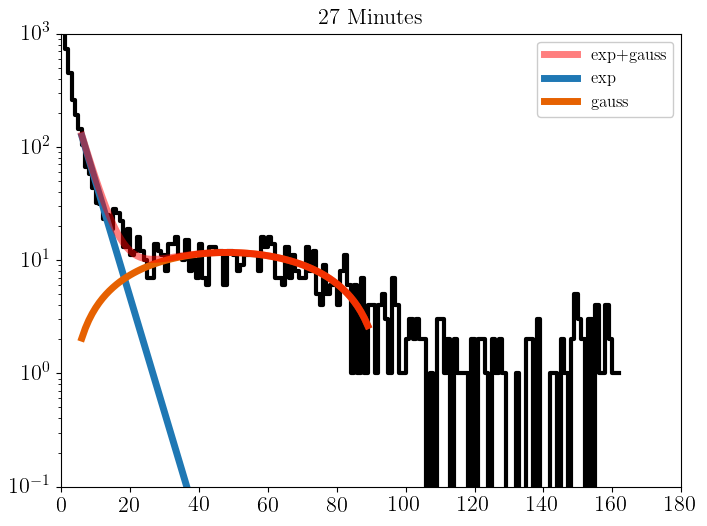

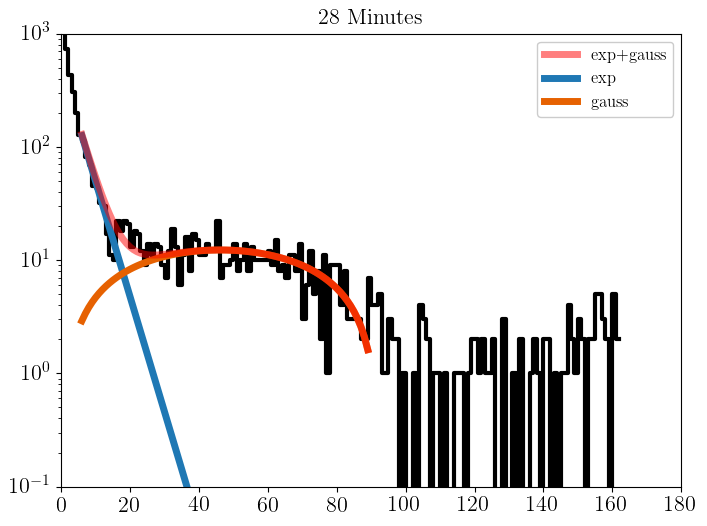

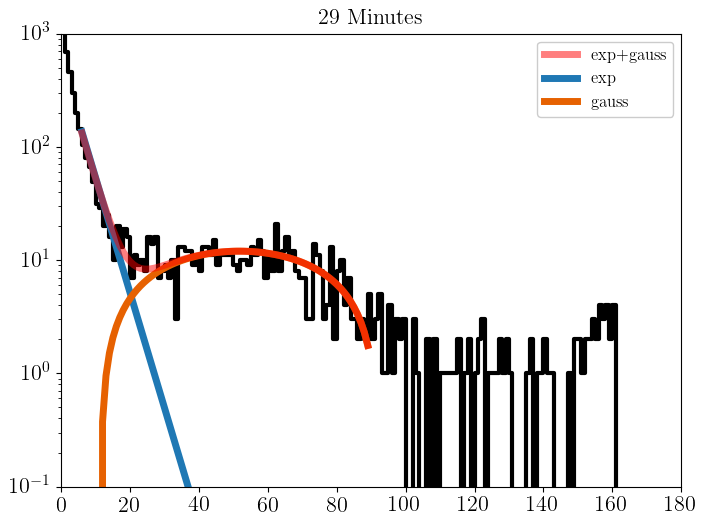

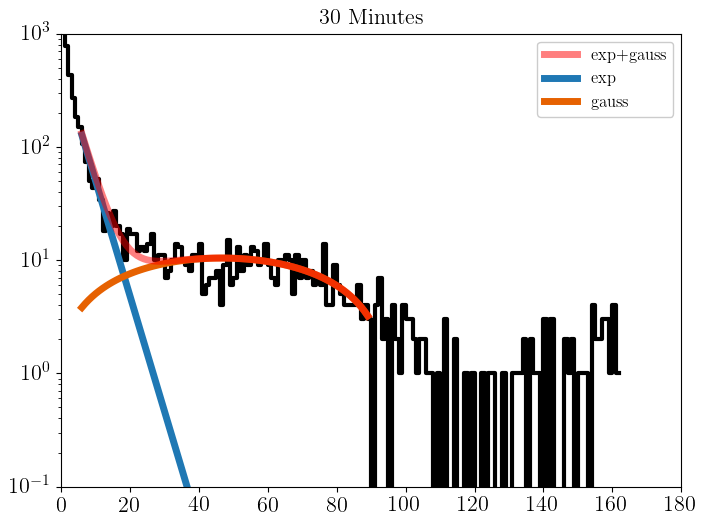

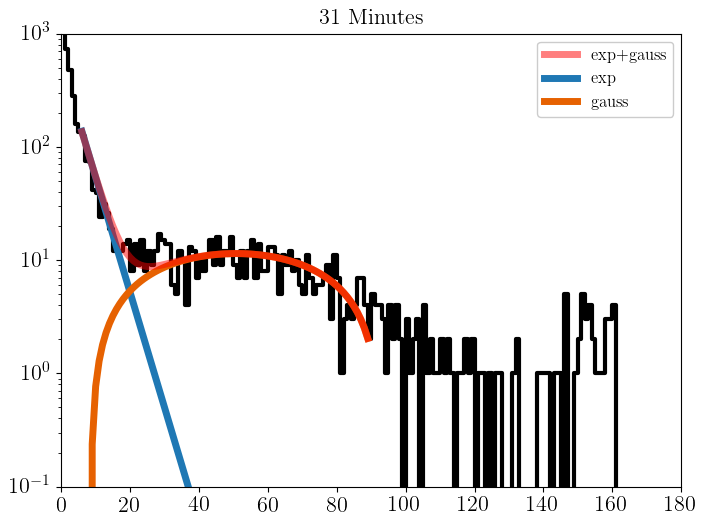

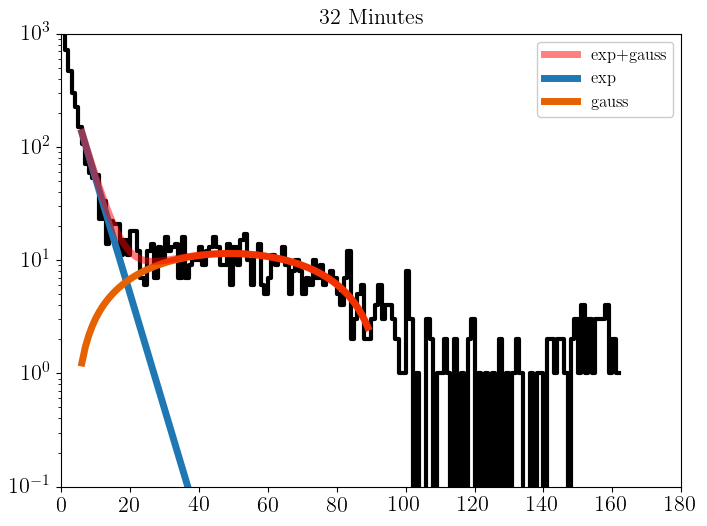

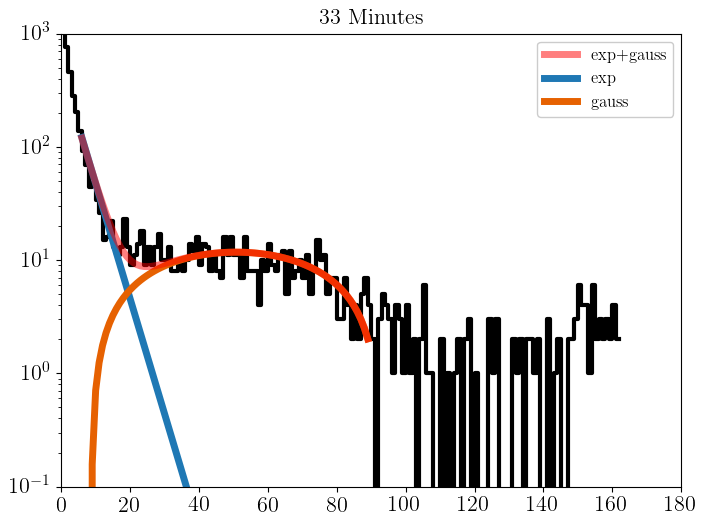

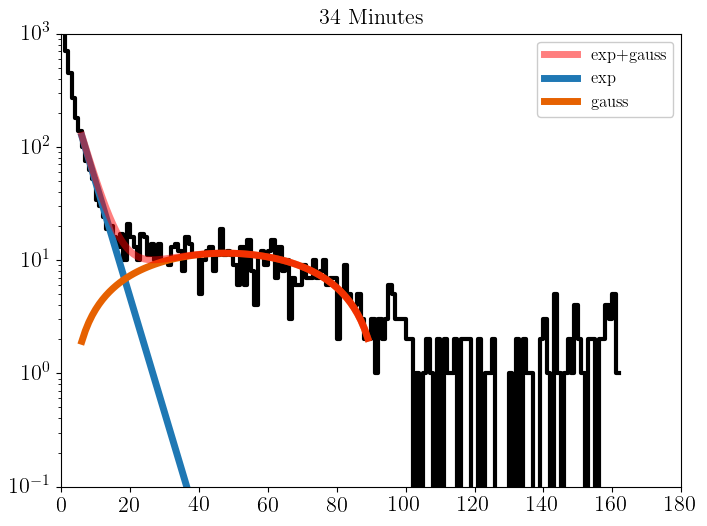

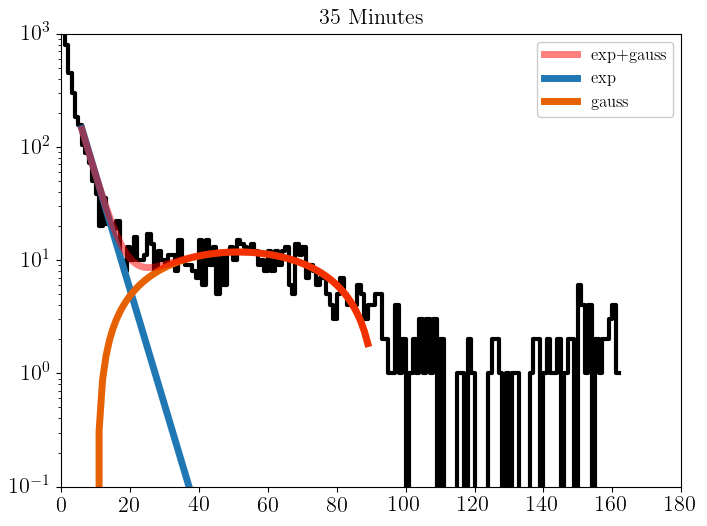

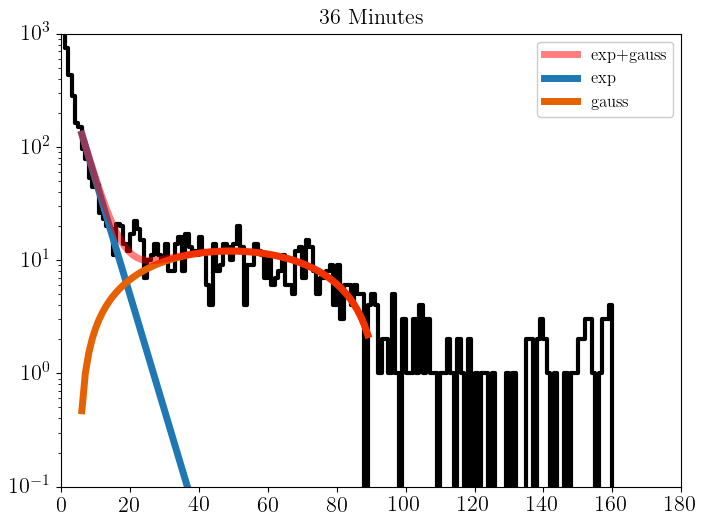

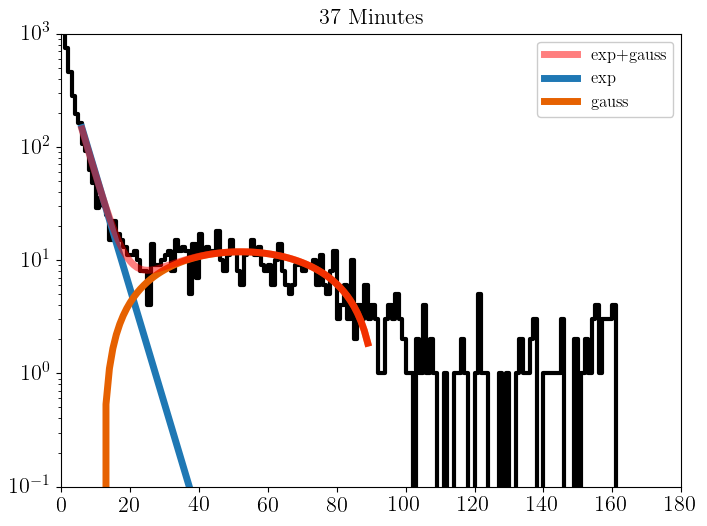

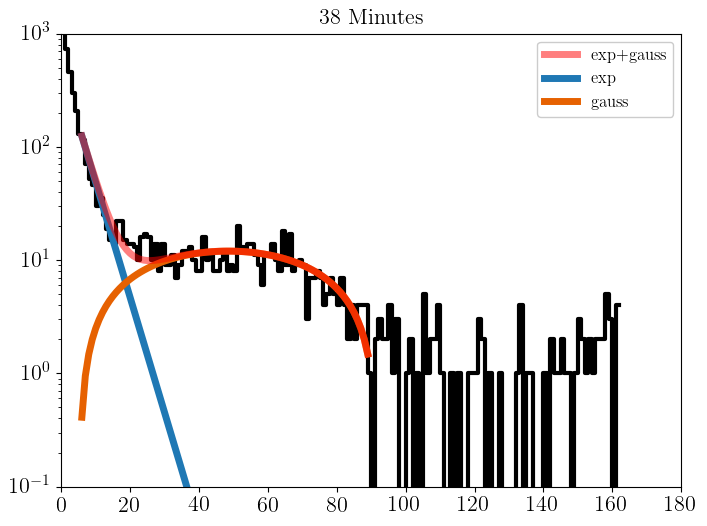

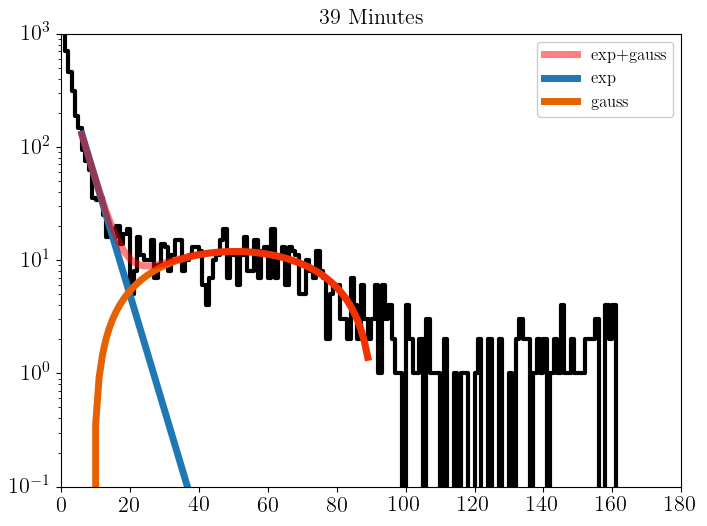

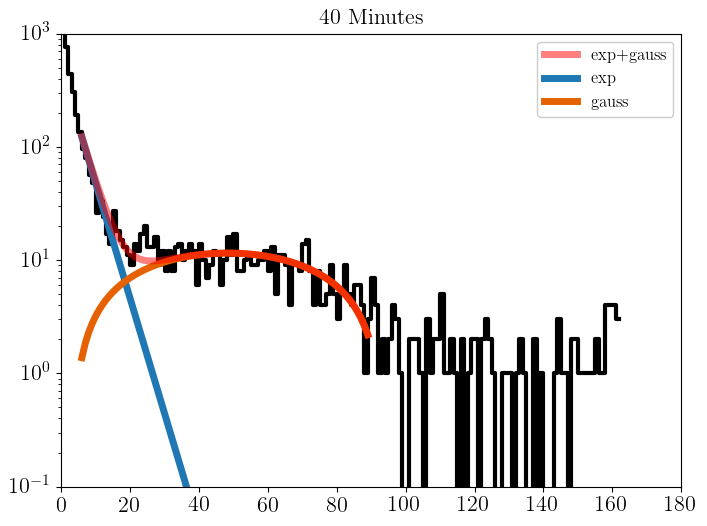

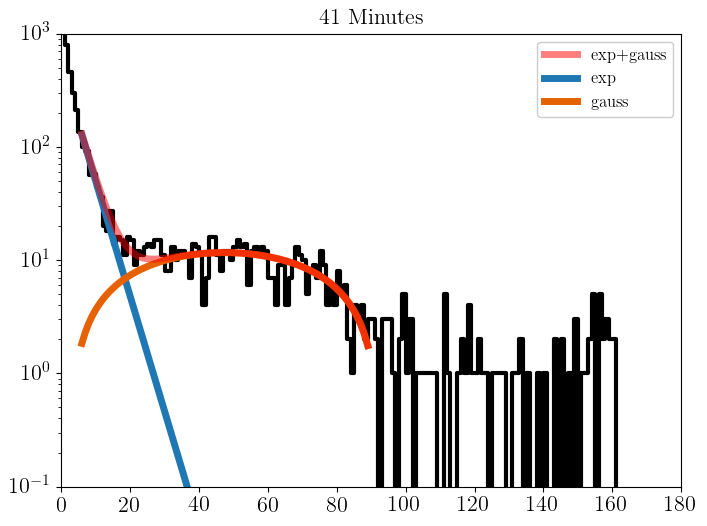

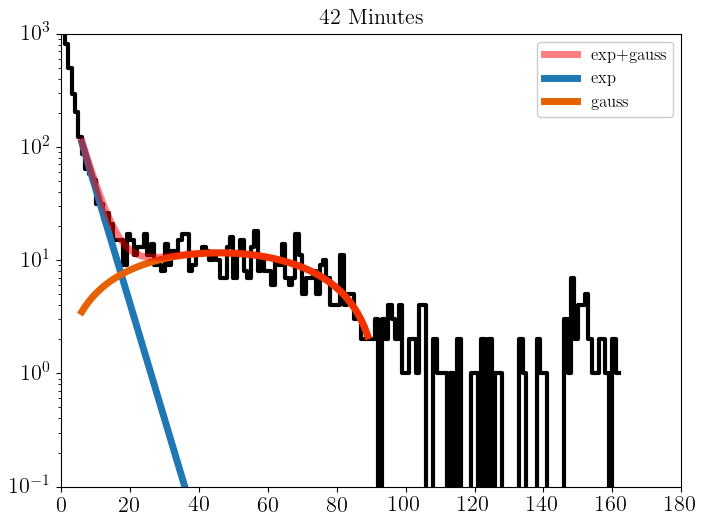

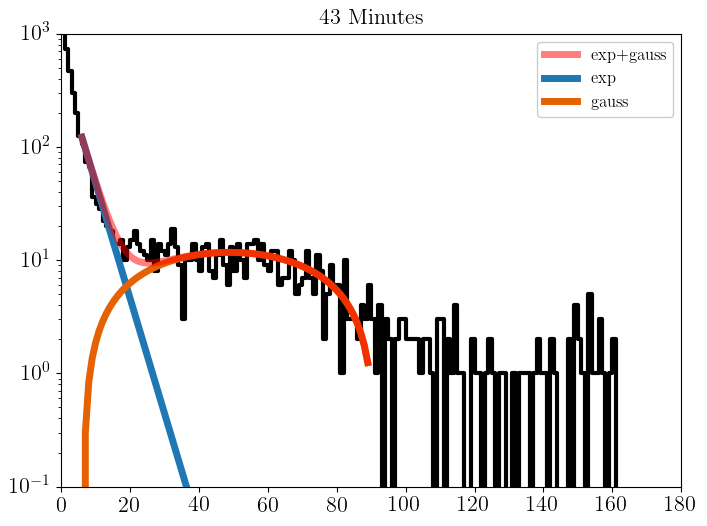

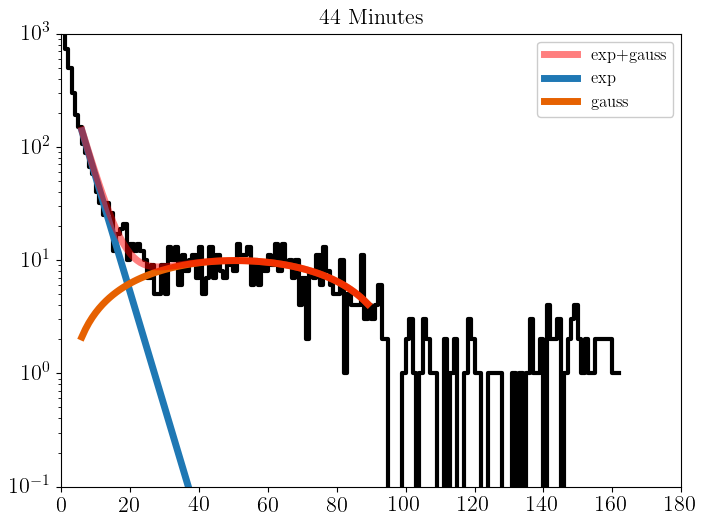

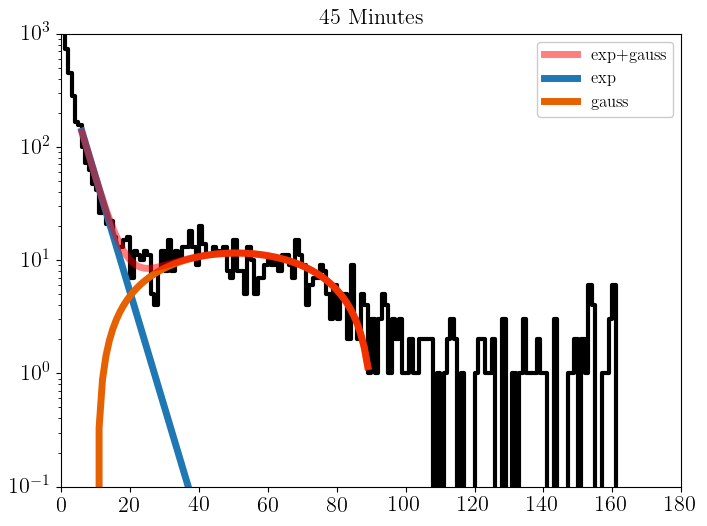

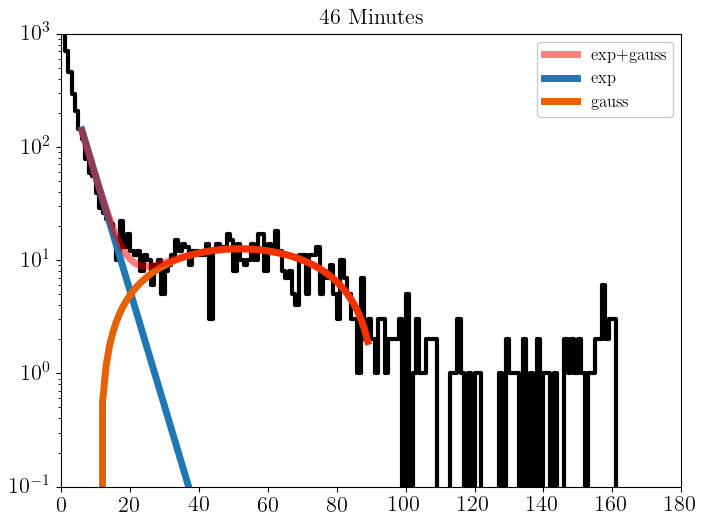

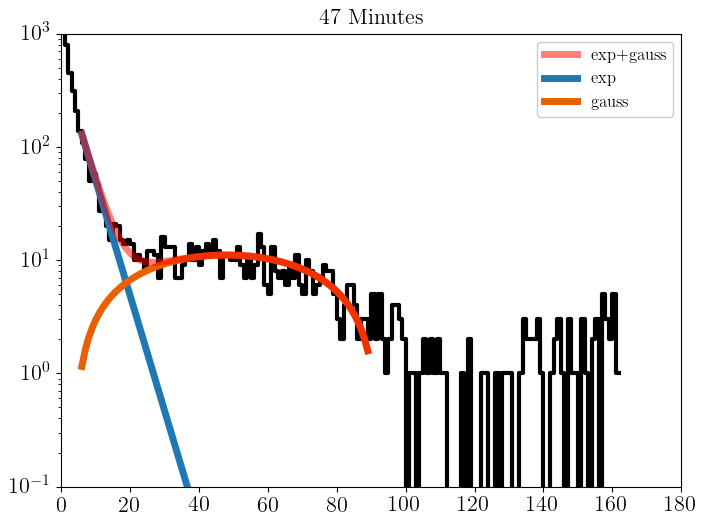

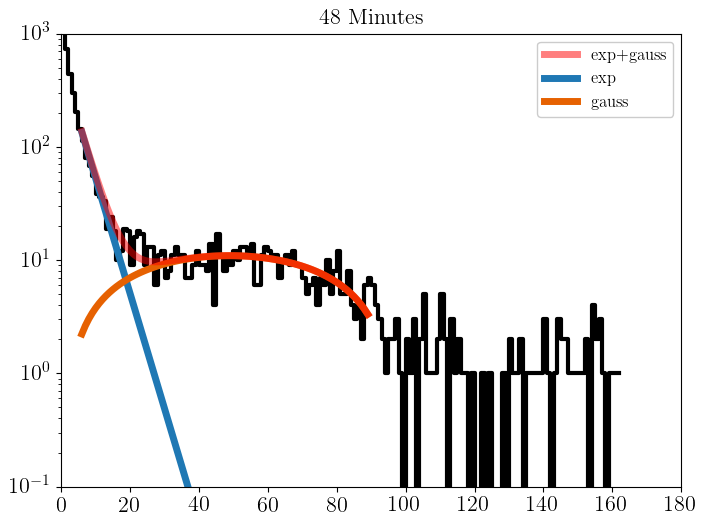

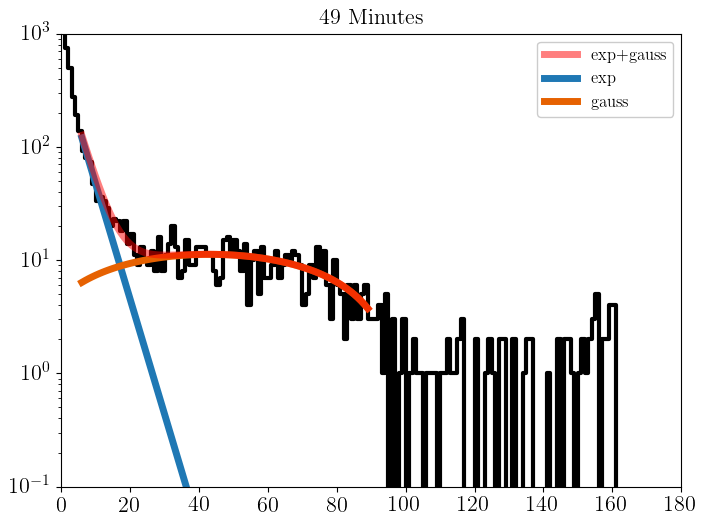

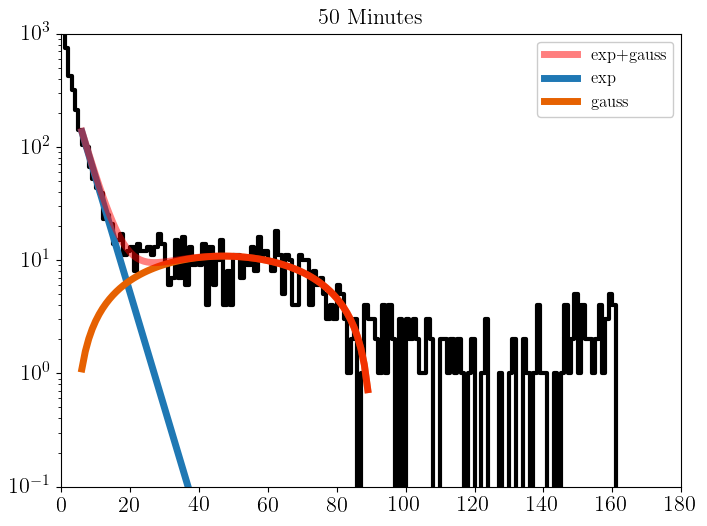

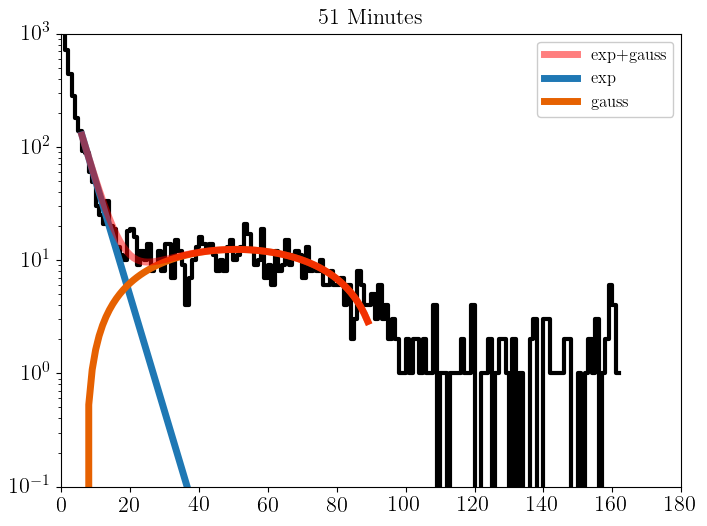

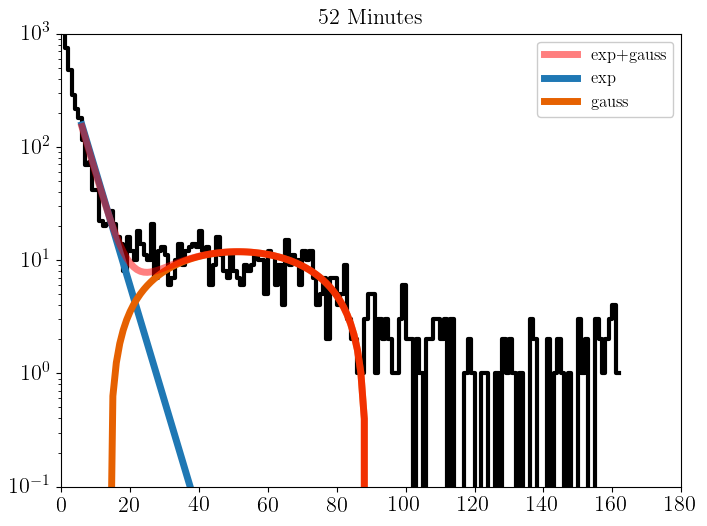

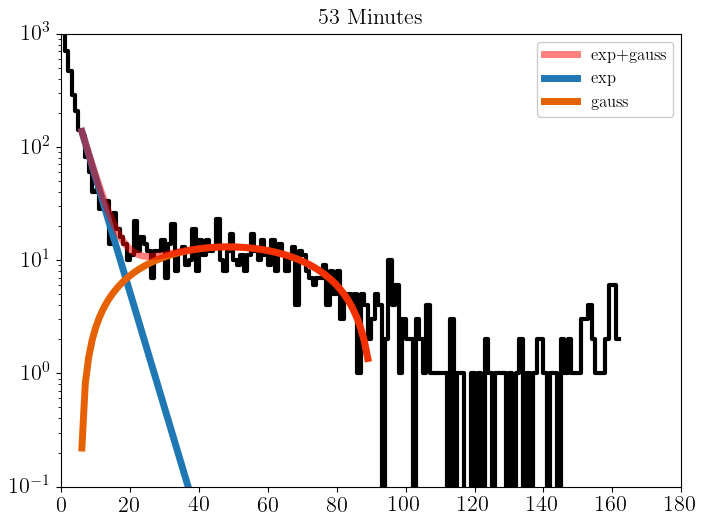

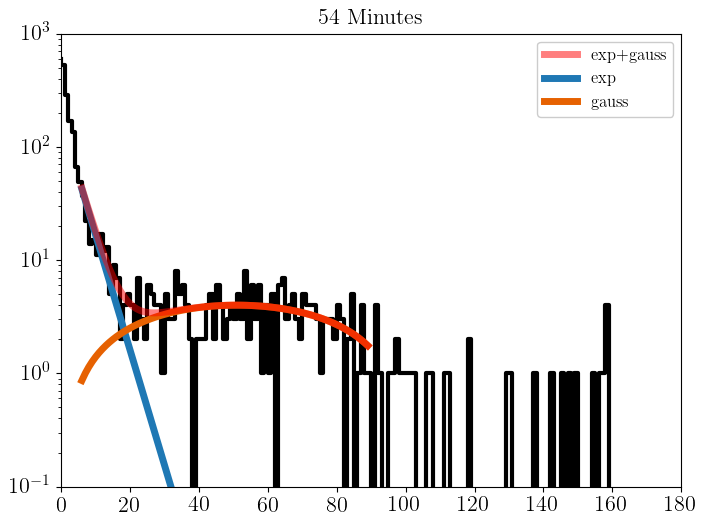

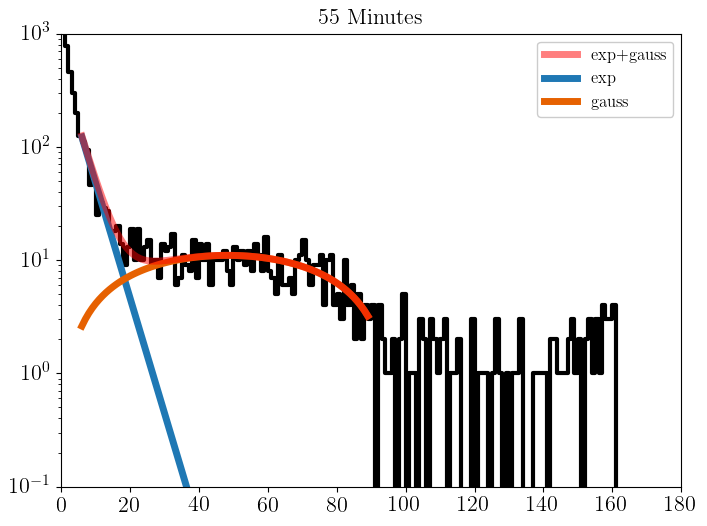

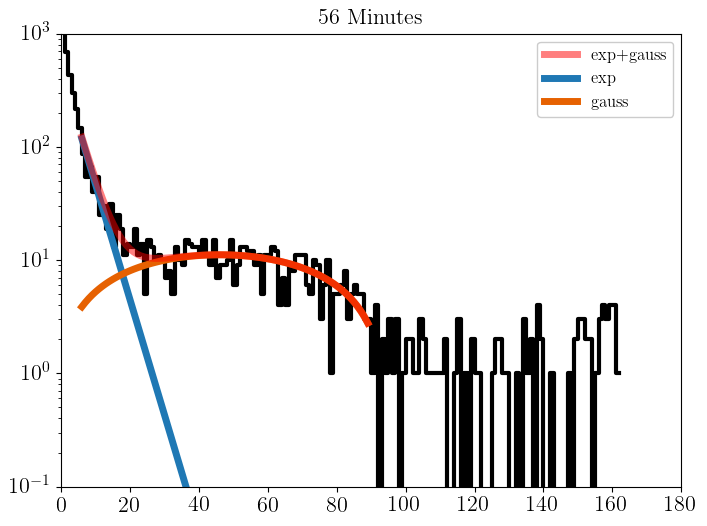

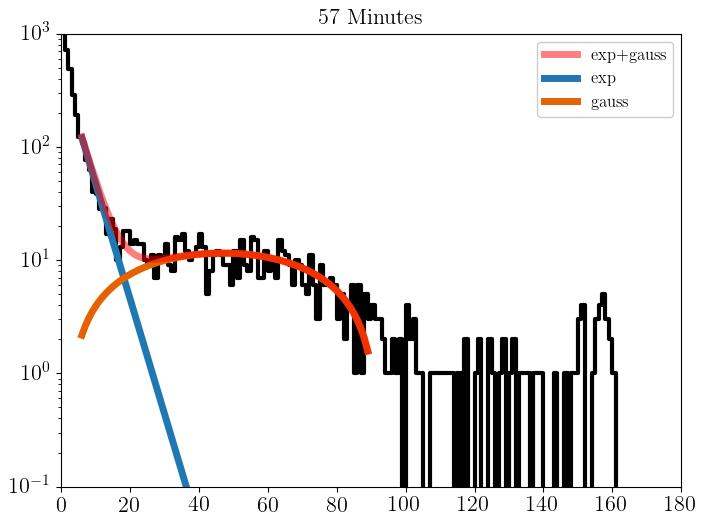

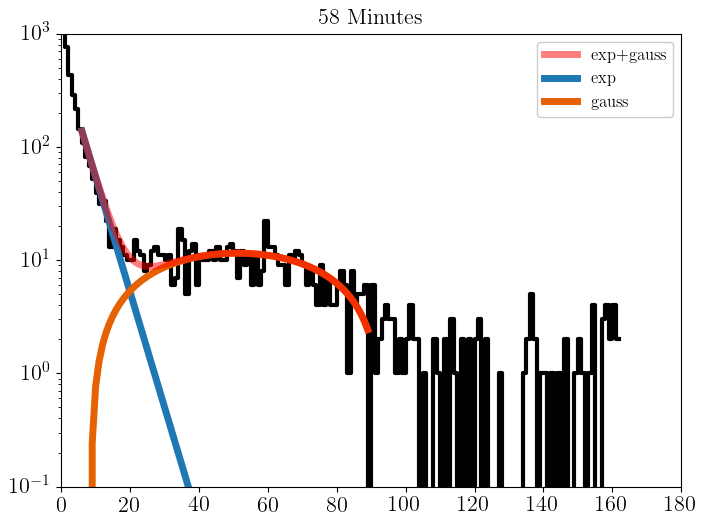

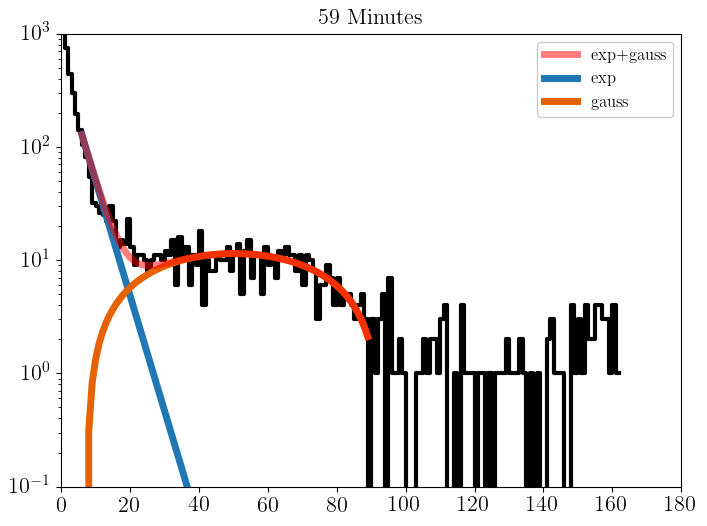

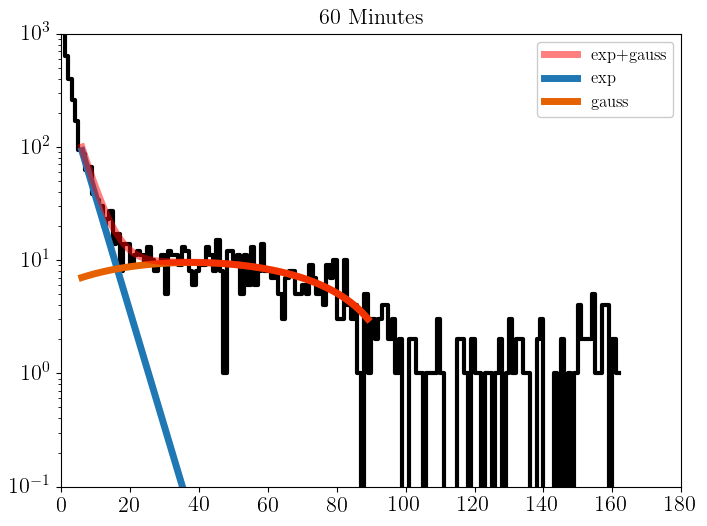

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [17]:
def func_new(x,h,c,mu,a):
    return(h*np.exp(-x*popt[1])+c+(a*np.exp(-0.5*((x-mu)/popt[5])**2)))

def gauss(x,a,mu,sigma,c):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2)+c)

def exp(x,h,b):
    return(h*np.exp(-x*b))


dir='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20220117/source_data_32V/'
filename=[]
time_s=[]
popt_list=[]
pcov_list=[]
for filenames in os.listdir(dir):
    filename.append(dir+filenames)
for file in natsort.natsorted(filename):
    df=pd.read_csv(file)
    time=(str(round(int(df.columns[1])/60))+' Minutes')
    time_s.append(int(df.columns[1]))
    df=pd.read_csv(file,skiprows=1)
    hx,h=rebin(np.array(df['Channel']),np.array(df['Counts']),100)
    plt.figure(figsize=(8,6))
    if np.max(h)!=0:
        cut=cut=np.where((hx>5) & (hx<90))
        popt_new,pcov_new=curve_fit(func_new,hx[cut],h[cut],p0=[np.max(h[cut]),2,50,100],maxfev=100000)
        popt_list.append(popt_new)
        pcov_list.append(pcov_new)
        plt.step(hx,h,lw=3,color='k')
        plt.plot(hx[cut],func_new(hx[cut],*popt_new),color='r',zorder=10,label='exp+gauss',lw=5,alpha=0.5)
        plt.plot(hx[cut],exp(hx[cut],popt_new[0],popt[1]),lw=5,label='exp')
        plt.plot(hx[cut],gauss(hx[cut],popt_new[3],popt_new[2],popt[5],popt_new[1]),lw=5,label='gauss')
        plt.legend(loc=1)  
        plt.title(time)
        plt.yscale('log')
        plt.ylim(0.1,1e3)
        plt.show()


In [6]:
mu_list=[]
mu_err_list=[]
for array in popt_list:
    mu_list.append(array[2])
for arrays in pcov_list:
    mu_err_list.append(np.sqrt(np.diag(arrays))[2])

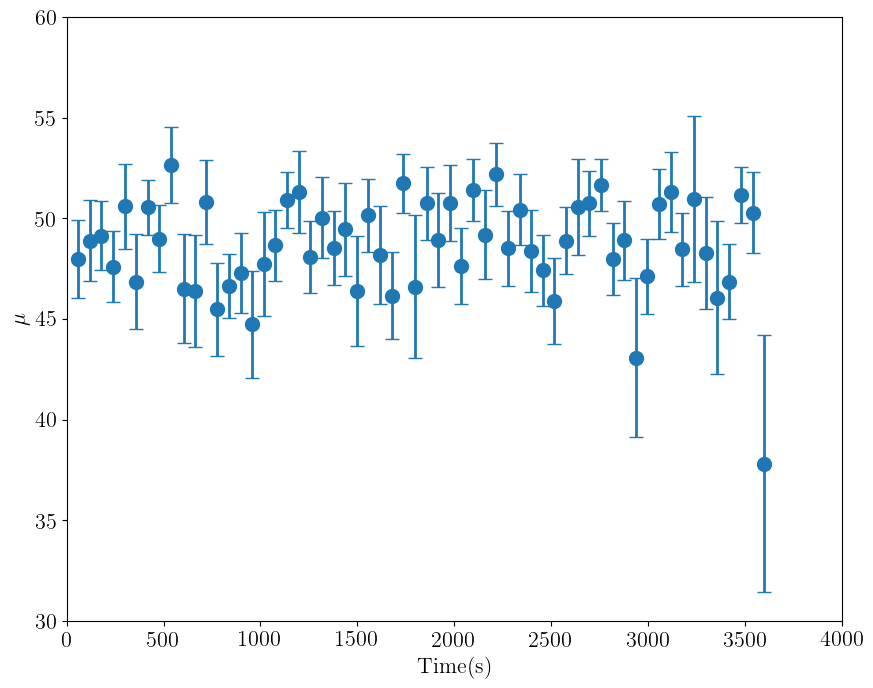

In [7]:
plt.figure(figsize=(10,8))
plt.errorbar(time_s[:-8],mu_list,yerr=mu_err_list,fmt='o')
plt.xlabel('Time(s)')
plt.ylabel('$\mu$')
plt.ylim(30,60)
plt.show()

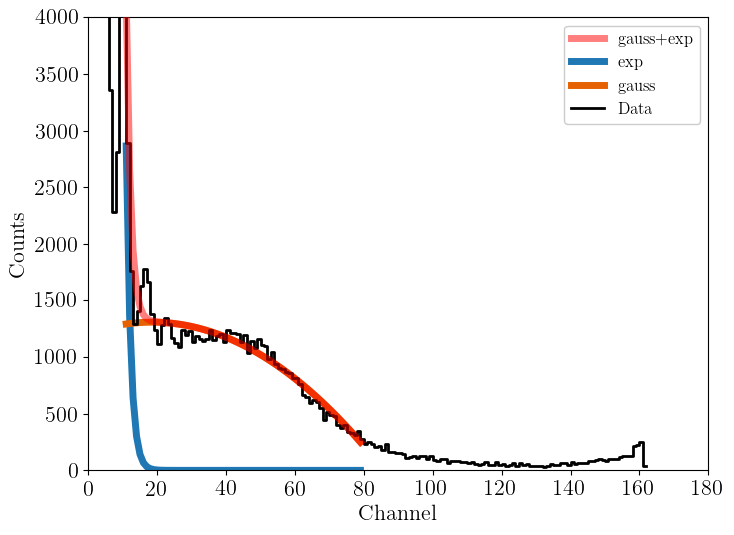

In [25]:
dir='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20220117/source_data_field_32V/'
filename=[]
count_sum=0
channel_sum=0
for filenames in os.listdir(dir):
    filename.append(dir+filenames)
for files in natsort.natsorted(filename):
    df=pd.read_csv(files,skiprows=1)
    count_sum+=df['Counts']
    channel_sum+=df['Channel']
    
hx,h=rebin(np.array(channel_sum),np.array(count_sum),100)
cut=np.where((hx>10) & (hx<80))
popt,pcov=curve_fit(func,hx[cut],h[cut],p0=[np.max(h[cut]),0.1,2,np.max(h[cut]),50,10],maxfev=100000)
plt.figure(figsize=(8,6))
plt.plot(hx[cut],func(hx[cut],*popt),color='r',zorder=10,label='gauss+exp',lw=5,alpha=0.5)
plt.plot(hx[cut],exp(hx[cut],popt[0],popt[1]),lw=5,label='exp')
plt.plot(hx[cut],gauss(hx[cut],popt[3],popt[4],popt[5],popt[2]),lw=5,label='gauss')
plt.step(hx,h,lw=2,color='k',label='Data')
# plt.yscale('log')
plt.legend(loc=1)
plt.ylim(0,4000)
plt.ylabel('Counts')
plt.xlabel('Channel')
plt.show()

In [9]:
print(len(time_s_field[:-16]))

85
